In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
OceanSODA = xr.open_dataset('OceanSODA-ETHZ_1985-2019_v2020b.nc')

In [3]:
HadISST = xr.open_dataset('HadISST_sst.nc')

In [4]:
OceanSODA

<xarray.Dataset>
Dimensions:         (lat: 180, lon: 360, time: 408)
Coordinates:
  * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon             (lon) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time            (time) datetime64[ns] 1985-01-01 1985-02-01 ... 2018-12-01
Data variables: (12/13)
    CO3             (time, lat, lon) float64 ...
    DIC             (time, lat, lon) float64 ...
    HCO3            (time, lat, lon) float64 ...
    TA              (time, lat, lon) float64 ...
    TAstd           (time, lat, lon) float64 ...
    omegaAR         (time, lat, lon) float64 ...
    ...              ...
    pCO2            (time, lat, lon) float64 ...
    pCO2std         (time, lat, lon) float64 ...
    pH              (time, lat, lon) float64 ...
    revelle_factor  (time, lat, lon) float64 ...
    salinity        (time, lat, lon) float64 ...
    temperature     (time, lat, lon) float64 ...
Attributes:
    contact:      gregorl@ethz.ch
    author:       Luke Gregor
    institution:  ETH Zuerich
    date:         2020-11-01
    changelog:    v2020b: missing data for 1985-01 and 2018-12 now filled
    reference:    Gregor, L. and Gruber, N.: OceanSODA-ETHZ: A global gridded...
    source:       https://doi.org/10.25921/m5wx-ja34
    description:  The marine carbonate system solved using pCO2 and TA estima...

In [5]:
HadISST

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 1769)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T11:59:59.505615234 ... 2017-0...
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    7/7/2017 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [6]:
OceanSODA_sst = OceanSODA.temperature
HadISST_sst = HadISST.sst

In [7]:
OceanSODA_sst_1985 = OceanSODA_sst.sel(time=slice('1985-01-01','1985-12-31')).mean(dim='time')
OceanSODA_sst_2010 = OceanSODA_sst.sel(time=slice('2010-01-01','2010-12-31')).mean(dim='time')
HadISST_sst_1985 = HadISST_sst.sel(time=slice('1985-01-01','1985-12-31')).mean(dim='time')
HadISST_sst_2010 = HadISST_sst.sel(time=slice('2010-01-01','2010-12-31')).mean(dim='time')

In [8]:
OceanSODA_diff = OceanSODA_sst_2010 - OceanSODA_sst_1985
HadISST_diff = HadISST_sst_2010 - HadISST_sst_1985

In [9]:
HadISST_diff

<xarray.DataArray 'sst' (latitude: 180, longitude: 360)>
array([[ 2.4955829e+02,  2.4955005e+02,  2.4955878e+02, ...,
         2.4955878e+02,  2.4955859e+02,  2.4955841e+02],
       [ 1.2207031e-04, -8.3183228e+01, -1.6636658e+02, ...,
        -8.3183197e+01, -8.3183197e+01, -8.3183228e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5

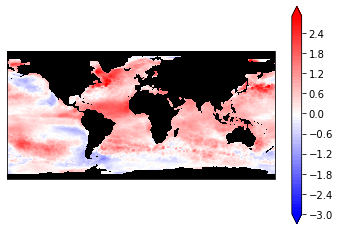

In [14]:
f, ax = plt.subplots(nrows=1,ncols=1,subplot_kw=dict(projection=ccrs.Robinson()))
ax.add_feature(cfeature.LAND,color='k')
ax.coastlines(color='k')

im = ax.contourf(OceanSODA_diff.lon, OceanSODA_diff.lat, OceanSODA_diff,
                transform=ccrs.Robinson(),
                cmap = 'bwr',
                levels = np.arange(-3, 3, 0.1),
                extend = 'both')

f.colorbar(im)

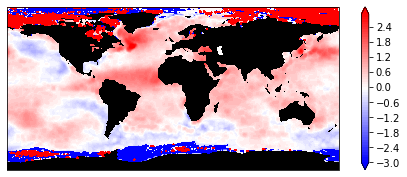

In [15]:
f, ax = plt.subplots(nrows=1,ncols=1,figsize = (8,3),subplot_kw=dict(projection=ccrs.Robinson()))
ax.add_feature(cfeature.LAND,color='k')
ax.coastlines(color='k')

im = ax.contourf(HadISST_diff.longitude, HadISST_diff.latitude, HadISST_diff,
                transform=ccrs.Robinson(),
                cmap = 'bwr',
                levels = np.arange(-3, 3, 0.1),
                extend = 'both')

f.colorbar(im)